In [5]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.metrics import accuracy_score 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import numpy.random as r 
import matplotlib.pyplot as plt 
import cv2

import glob
import matplotlib.gridspec as gridspec #A grid layout to place subplots within a figure.
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix
import seaborn as sn #for visualization


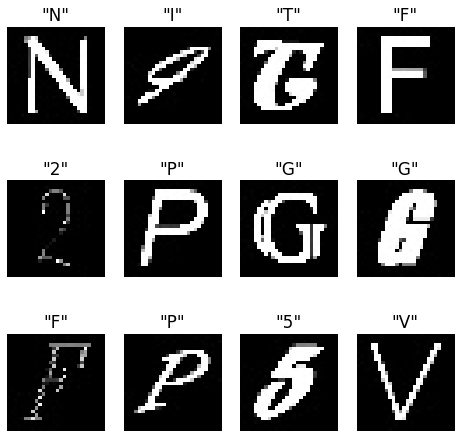

In [6]:
characters = glob.glob("dataset_characters/**/*.jpg")
cols=4
rows=3
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)

# create a random list of images will be displayed
np.random.seed(45)
rand = np.random.randint(0,len(characters),size=(cols*rows))

# Plot example images
for i in range(cols*rows):
    fig.add_subplot(grid[i])
    image = load_img(characters[rand[i]])
    label = characters[rand[i]].split(os.path.sep)[-2]
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

In [7]:
X=[]
labels =[]

for image_path in characters:
    image = cv2.imread(image_path, 0) #0 = grayscale
    image = cv2.resize(image, (28, 28)) 
    X.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels.append(label)

    
print(image.shape)
print(image.size)
 
X = np.array(X, dtype = "float")
print(len(labels))

(28, 28)
784
37623


In [9]:
#print(X[0])
y = np.array(labels)
#y = y.reshape(y.shape[0],1)
print(y.shape)

(37623,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26336, 28, 28)
(11287, 28, 28)
(26336,)
(11287,)


In [12]:
num_pixels = 784 #28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(26336, 784)
(11287, 784)


In [13]:
#linear kernel
param_C = 100
param_gamma = 0.0001
model = svm.SVC(kernel = 'poly', C=param_C,gamma=param_gamma) #'polynomial', 'rbf'

In [14]:
model.fit(X_train, y_train)

SVC(C=100, gamma=0.0001, kernel='poly')

In [16]:
expected = y_test 
y_predicted = model.predict(X_test)

In [17]:
print(metrics.classification_report(expected, y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       339
           1       0.80      0.87      0.84       300
           2       0.94      0.95      0.94       311
           3       0.89      0.91      0.90       314
           4       0.93      0.92      0.93       292
           5       0.93      0.90      0.91       343
           6       0.96      0.87      0.91       323
           7       0.91      0.93      0.92       318
           8       0.88      0.88      0.88       340
           9       0.92      0.89      0.91       330
           A       0.93      0.90      0.91       316
           B       0.80      0.86      0.83       324
           C       0.93      0.92      0.92       306
           D       0.96      0.94      0.95       351
           E       0.94      0.88      0.91       302
           F       0.74      0.94      0.83       279
           G       0.78      0.91      0.84       337
           H       0.84    

In [18]:
cm = metrics.confusion_matrix(expected, y_predicted)
print(cm)

[[273   0   0 ...   0   0   0]
 [  0 262   2 ...   3   1   3]
 [  0   0 294 ...   0   0   2]
 ...
 [  0   2   0 ... 304   0   2]
 [  0   2   0 ...   1 264   0]
 [  0   4   2 ...   0   1 268]]


In [19]:
model.score(X_test, y_test)#how good the model is 

0.8786214228758749

In [20]:
acc_train_svm_linear = []
acc_test_svm_linear = []
cVals= [0.0001, 0.001, 0.01, 0.1, 1, 10]
c_svm_linear = []

In [21]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_linear.fit(X_train, y_train)
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [22]:
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.996848
Test Accuracy = 0.918933
Train Accuracy = 0.998747
Test Accuracy = 0.917782
Train Accuracy = 0.999696
Test Accuracy = 0.918047
Train Accuracy = 0.999848
Test Accuracy = 0.918136
Train Accuracy = 0.999848
Test Accuracy = 0.918136
Train Accuracy = 0.999848
Test Accuracy = 0.918136


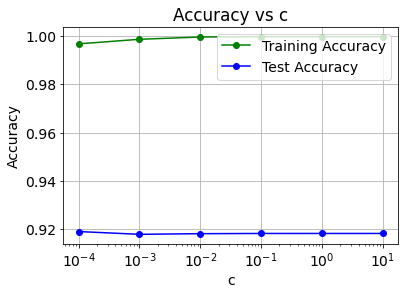

In [24]:
plt.plot(cVals, acc_train_svm_linear, color="green", marker="o")
plt.plot(cVals, acc_test_svm_linear, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')